# LCLS cu_hxr from archived data

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [18]:
#%pylab inline

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
font = {'weight' : 'medium',
       'size'   : 16}
matplotlib.rc('font', **font)

In [5]:
from lcls_live.datamaps import get_datamaps
from lcls_live.archiver import lcls_archiver_restore

import os

In [3]:
#BEAMPATH = 'cu_sxr'
BEAMPATH = 'cu_hxr'

## Datamaps, and all PVs needed

In [5]:
DM = get_datamaps(BEAMPATH)

DM.keys()

dict_keys(['bpms', 'collimators', 'subboosters', 'linac', 'K21_1', 'K21_2', 'K21_3', 'K21_4', 'K21_5', 'K21_6', 'K21_7', 'K21_8', 'K22_1', 'K22_2', 'K22_3', 'K22_4', 'K22_5', 'K22_6', 'K22_7', 'K22_8', 'K23_1', 'K23_2', 'K23_3', 'K23_4', 'K23_5', 'K23_6', 'K23_7', 'K23_8', 'K24_1', 'K24_2', 'K24_3', 'K24_4', 'K24_5', 'K24_6', 'K25_1', 'K25_2', 'K25_3', 'K25_4', 'K25_5', 'K25_6', 'K25_7', 'K25_8', 'K26_1', 'K26_2', 'K26_3', 'K26_4', 'K26_5', 'K26_6', 'K26_7', 'K26_8', 'K27_1', 'K27_2', 'K27_3', 'K27_4', 'K27_5', 'K27_6', 'K27_7', 'K27_8', 'K28_1', 'K28_2', 'K28_3', 'K28_4', 'K28_5', 'K28_6', 'K28_7', 'K28_8', 'K29_1', 'K29_2', 'K29_3', 'K29_4', 'K29_5', 'K29_6', 'K29_7', 'K29_8', 'K30_1', 'K30_2', 'K30_3', 'K30_4', 'K30_5', 'K30_6', 'K30_7', 'K30_8', 'quad', 'beginning_WS02', 'tao_energy_measurements'])

In [6]:
# datamaps to exclude

#DENYLIST = ['beginning_WS02', 'quad']
#DENYLIST = ['collimators', 'subboosters', 'beginning_WS02','tao_energy_measurements']
#DENYLIST = ['beginning_WS02','tao_energy_measurements']
DENYLIST = ['beginning_WS02']

#########################

# PVs needed
DM2 = {}
ALLPVS = []
for name, dm in DM.items():
    if name in DENYLIST:
        continue
    DM2[name] = dm
    ALLPVS.extend(dm.pvlist)
ALLPVS = list(set(ALLPVS))
len(ALLPVS)

1076

In [7]:
# Run this cell if only want a small set of DMs

#ONLYLIST = ['quad']

#DM2 = {}
#ALLPVS = []
#for name, dm in DM.items():
#    if name not in ONLYLIST:
#        continue
#    DM3[name] = dm
#    ALLPVS.extend(dm.pvlist)
#ALLPVS = list(set(ALLPVS))
#len(ALLPVS)

In [8]:
# Find the DM for a target PV
target = 'ACCL:LI25:1:PDES'

for name, dm in DM.items():
    if target in dm.pvlist:
        print(name)

linac


## Archiver restore

In [9]:
# Optional off-site setup

# Open an SSH tunnel in a terminal like:
# ssh -D 8080 <some user>@<some SLAC machine>
# ssh -D 8080 wlou@centos7.slac.stanford.edu

OFFSITE=True

if OFFSITE:
    os.environ['http_proxy']='socks5h://localhost:8080'
    os.environ['HTTPS_PROXY']='socks5h://localhost:8080'
    os.environ['ALL_PROXY']='socks5h://localhost:8080'

In [10]:
# Timestamps from Zhen 

#t1_sxr = "2021-07-26-175245"
#t2_sxr = "2021-07-26-215032"
#t3_sxr = "2021-07-27-002414"

t1_hxr = "2021-11-03-162330"
t2_hxr = "2021-11-03-162349"
t3_hxr = "2021-11-03-162407"

import datetime
import pytz

def to_ISO8601_time(time_string):
    t = datetime.datetime.strptime(time_string, '%Y-%m-%d-%H%M%S')
    tz = pytz.timezone('US/Pacific')
    return tz.localize(t).isoformat(timespec='microseconds')

t1_hxr = to_ISO8601_time(t1_hxr)
t2_hxr = to_ISO8601_time(t2_hxr)
t3_hxr = to_ISO8601_time(t3_hxr)

ISOTIME = t1_hxr

In [11]:
PVDATA = lcls_archiver_restore(ALLPVS, ISOTIME)

Requesting: http://lcls-archapp.slac.stanford.edu/retrieval/data/getDataAtTime?at=2021-11-03T16:23:30.000000-07:00&includeProxies=true


## Form commands using PVDATA and datamaps

In [12]:
timestamp_CMDS = []

for name, dm in DM2.items():
    timestamp_CMDS.extend(dm.as_tao(PVDATA))

timestamp_CMDS;

## Useful functions for Tao

In [11]:
def get_twiss(tao, ele):
    t1 = tao.lat_list(ele, 'beta_a')[0]
    t2 = tao.lat_list(ele, 'alpha_a')[0]
    t3 = tao.lat_list(ele, 'beta_b')[0]
    t4 = tao.lat_list(ele, 'alpha_b')[0]
    t5 = tao.lat_list(ele, 'eta_x')[0]
    t6 = tao.lat_list(ele, 'etap_x')[0]
    t7 = tao.lat_list(ele, 'eta_y')[0]
    t8 = tao.lat_list(ele, 'etap_y')[0]
    return t1, t2, t3, t4, t5, t6, t7, t8

In [12]:
# Output collecting

outkeys = """ele.name
ele.ix_ele
ele.ix_branch
ele.a.beta
ele.a.alpha
ele.a.eta
ele.a.etap
ele.a.gamma
ele.a.phi
ele.b.beta
ele.b.alpha
ele.b.eta
ele.b.etap
ele.b.gamma
ele.b.phi
ele.x.eta
ele.x.etap
ele.y.eta
ele.y.etap
ele.s
ele.l
ele.e_tot
ele.p0c
ele.mat6
ele.vec0
""".split()
def get_output(tao):
    return {k:tao.lat_list('*', k) for k in outkeys}

def plot_twiss(output, ix1=0, ix2=-1):
    
    fig, ax = plt.subplots(figsize=(16,4))
    
    ax.plot(output['ele.s'][ix1:ix2], output['ele.a.beta'][ix1:ix2], label = r'$\beta_a$')
    ax.plot(output['ele.s'][ix1:ix2], output['ele.b.beta'][ix1:ix2], label = r'$\beta_b$')
    plt.legend()
    
    ax.set_xlabel('s (m)')
    ax.set_ylabel('Twiss Beta (m)')
    
def plot_twiss2(output, ix1=0, ix2=-1):
    fig, ax = plt.subplots(figsize=(16,4))
    
    ax.plot(output['ele.s'][ix1:ix2], output['ele.x.eta'][ix1:ix2], label = r'$\eta_x$')
    ax.plot(output['ele.s'][ix1:ix2], output['ele.y.eta'][ix1:ix2], label = r'$\eta_y$')
    plt.legend()
    
    ax.set_xlabel('s (m)')
    ax.set_ylabel('Twiss eta (m)')

# Start Tao

In [6]:
from pytao import Tao

In [14]:
# Basic model with options
MODEL = 'cu_hxr' 

OPTIONS = f'-noplot'
INIT = f'-init $LCLS_LATTICE/bmad/models/{BEAMPATH}/tao.init {OPTIONS}'

# Make sure this exists
assert 'LCLS_LATTICE' in os.environ

In [15]:
tao = Tao(INIT)

In [16]:
BPM_string = f'*'

ele_name_list  = tao.lat_list(BPM_string,'ele.name')
s_list     = tao.lat_list(BPM_string,'ele.s')
beta_a_list = tao.lat_list(BPM_string,'ele.beta_a')
beta_b_list = tao.lat_list(BPM_string,'ele.beta_b')
eta_x_list = tao.lat_list(BPM_string,'ele.eta_x')
eta_y_list = tao.lat_list(BPM_string,'ele.eta_y')

ix_WS32 = ele_name_list.index('WS32')
ix_END = ele_name_list.index('END')

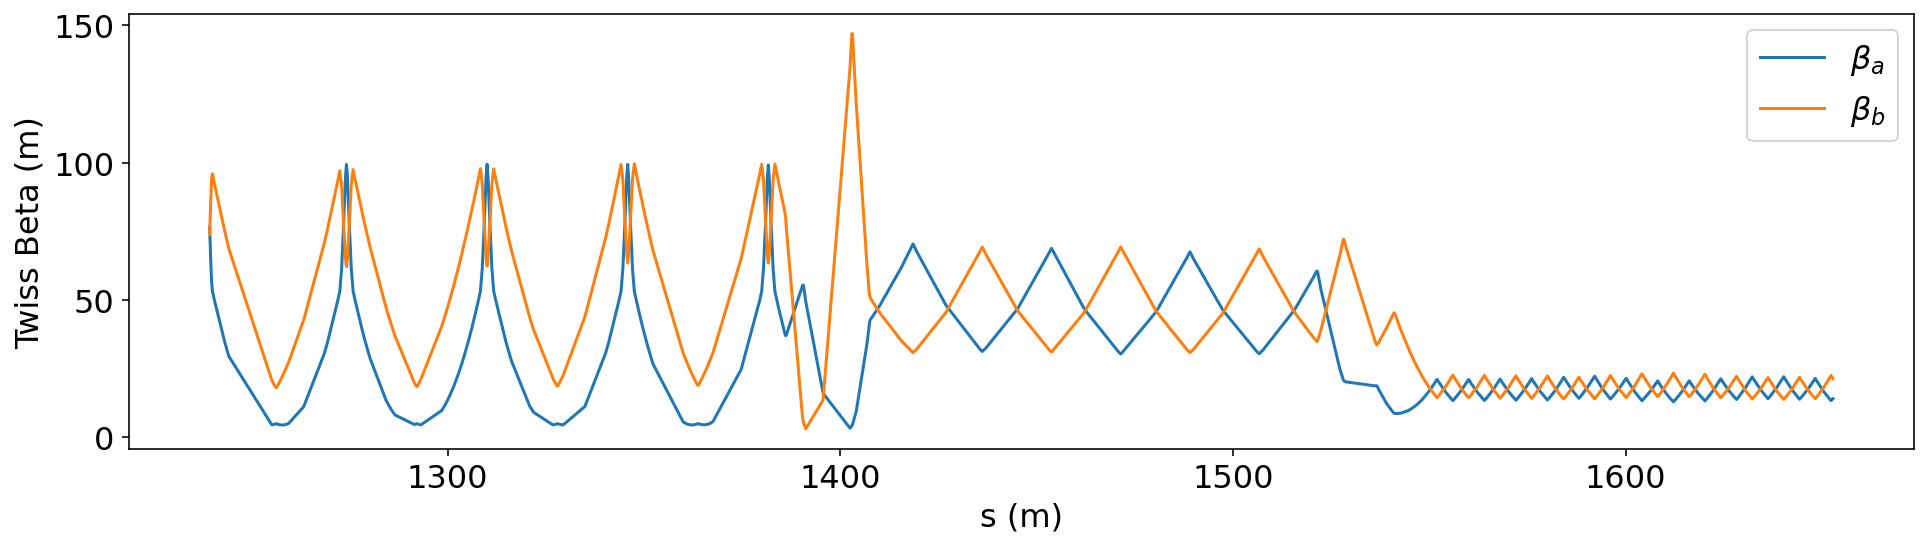

In [19]:
tao.cmd('SLD')

output = get_output(tao)
#plot_twiss(output, ix1=1,ix2=ix_END)    
plot_twiss(output, ix1=1700,ix2=2700)   

# Load in time-stamp for Tao

In [20]:
tao.cmd('SLD')

# apply commands from the time-stamp
tao.cmd('set global lattice_calc_on = F')
tao.cmd('set ele quad::* field_master = T')
tao.cmds(timestamp_CMDS);
tao.cmd('set global lattice_calc_on = T')
output = get_output(tao)

NameError: name 'timestamp_CMDS' is not defined

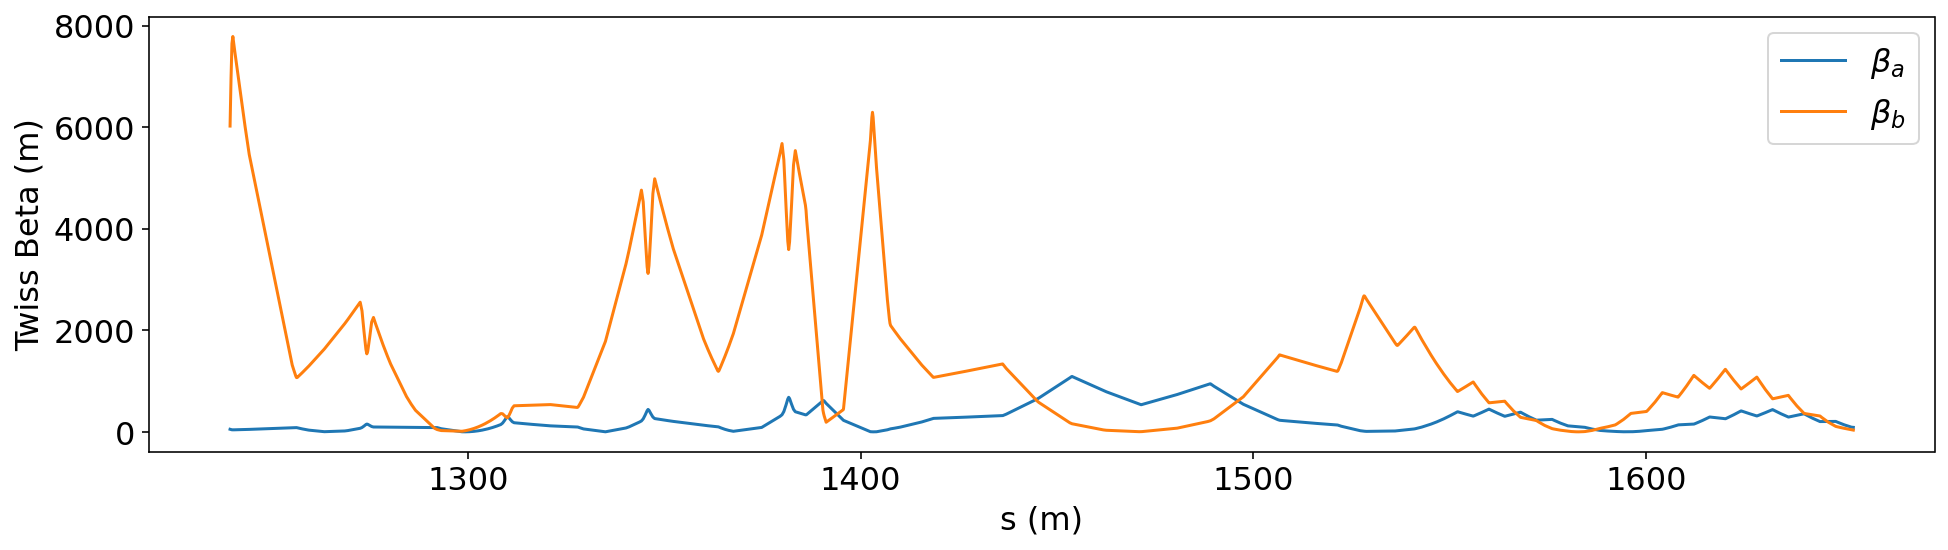

In [25]:


output = get_output(tao)
#plot_twiss(output, ix1=1,ix2=ix_END)    
plot_twiss(output, ix1=1700,ix2=2700)  

# Table generation from Tao

In [69]:
# Specify which elements to extract output from
ele_string = f'*END'

name_list_temp  = tao.lat_list(ele_string,'ele.name')
s_list_temp     = tao.lat_list(ele_string,'ele.s')
beta_a_list_temp = tao.lat_list(ele_string,'ele.beta_a')
beta_b_list_temp = tao.lat_list(ele_string,'ele.beta_b')
eta_x_list_temp = tao.lat_list(ele_string,'ele.eta_x')
eta_y_list_temp = tao.lat_list(ele_string,'ele.eta_y')

In [70]:
import pandas as pd 
df=pd.DataFrame()
df['Name'] = name_list_temp 
df['s(m)'] = s_list_temp
df['beta_a(m)']= beta_a_list_temp
df['beta_b(m)']= beta_a_list_temp
df['eta_x(m)'] = eta_x_list_temp
df['eta_y(m)'] = eta_y_list_temp

df

,Name,s(m),beta_a(m),beta_b(m),eta_x(m),eta_y(m)
0,LHEND,10.690580,9.736013,9.736013,-1.214306e-17,0.000000e+00
1,BC1CEND,37.921461,1.645784,1.645784,-5.111488e-03,0.000000e+00
2,LI21END,118.920561,54.454904,54.454904,-2.346135e-02,1.192824e-33
3,LI22END,220.520561,4.522922,4.522922,5.193867e-03,-6.633356e-33
4,LI23END,322.120561,43.205559,43.205559,1.137283e-02,3.396363e-33
5,BC2CEND,421.735361,9.226381,9.226381,-6.418753e-03,5.564642e-33
6,LI25END,525.334561,237.059009,237.059009,3.842429e-02,-2.748946e-33
7,LI26END,626.934561,217.055260,217.055260,-4.046762e-02,-3.403235e-33
8,LI27END,728.534561,3.768874,3.768874,2.468962e-03,5.196975e-33
9,LI28END,830.134561,92.890602,92.890602,2.959214e-02,-4.558268e-33


In [36]:
# Save the file
#df.to_csv(f'{ISOTIME}_twiss_output.csv')

# Below is for comparison with MATLAB model

# Matlab  ( data files generated by Zhen )

In [338]:
import scipy.io
import numpy as np

In [339]:
#mf_sxr = scipy.io.loadmat('data_for_william/data_for_william_example_1.mat')

mf = scipy.io.loadmat('data_for_william/model_data_2021-11-03-162330.mat')
#mf = scipy.io.loadmat('data_for_william/model_data_2021-11-03-162349.mat')
#mf = scipy.io.loadmat('data_for_william/model_data_2021-11-03-162407.mat')

In [340]:
print(mf.keys())

dict_keys(['__header__', '__version__', '__globals__', 'extmodel', 'designmodel', 'quadData', 'commts'])


### twiss = ($E, \phi_x, \beta_x, \alpha_x, \eta_x, \eta_x^{'}, \phi_y, \beta_y, \alpha_y, \eta_y, \eta_y^{'}$)

In [341]:
model_name = 'designmodel'
#model_name = 'extmodel'

s_array_mat = mf[model_name]['zPos'][0,0][0]
ele_name_array_mat = np.array([mf[model_name]['name'][0,0][i][0][0] for i in range(N_ele_mat)])
N_ele_mat = len(s_array_mat)
ix_WS32_mat = np.where(ele_name_array_mat == 'WS32')[0][0]


# This function extracts important arrays based on the model 
# model is either 'designmodel' or 'extmodel'
def load_matlab_data(model_name):
    
    etot_array_mat = mf[model_name]['twiss'][0,0][0]
    beta_x_array_mat = mf[model_name]['twiss'][0,0][2]
    beta_y_array_mat = mf[model_name]['twiss'][0,0][7]

    eta_x_array_mat = mf[model_name]['twiss'][0,0][4]
    eta_y_array_mat = mf[model_name]['twiss'][0,0][9]

    return etot_array_mat, beta_x_array_mat, beta_y_array_mat, eta_x_array_mat, eta_y_array_mat

def get_twiss_mat(ele_name, model_name):
    ixs_ele = np.where(ele_name_array_mat == ele_name)[0]
    
    if len(ixs_ele)>1:
        ix_ele = ixs_ele[-1]
    elif len(ixs_ele)==1:
        ix_ele = ixs_ele[0]
    else:
        print('Element not found!')
    
    t = mf[model_name]['twiss'][0,0][:,ix_ele]
    
    return t[2], t[3], t[7], t[8], t[4], t[5], t[9], t[10]

twiss_at_WS32_mat = get_twiss_mat('WS32', 'designmodel')

In [342]:
# rMat does from the beginning 

mf[model_name]['rMat'][0,0][:,:,ix_WS32_mat]

array([[-1.43209125e-01,  5.75762179e-01,  1.48898817e-21,
         7.56862297e-23,  3.00878661e-08,  6.01791191e-10],
       [-2.21437510e-03,  3.66564233e-03,  1.12120691e-22,
         5.66912101e-24, -6.72390949e-10, -1.33857905e-11],
       [ 1.56438510e-21, -7.24493540e-21, -1.55343441e-01,
        -9.97804318e-02,  3.21151502e-14,  6.38815945e-16],
       [-9.81729851e-24,  4.54326944e-23,  9.13132068e-03,
         1.03723157e-03, -1.65734216e-15, -3.31056858e-17],
       [ 4.73249212e-11, -1.44132040e-10, -9.81668834e-18,
         3.86096676e-17, -3.12697442e-02, -4.05537850e-04],
       [-3.15191224e-11,  1.35874100e-10,  0.00000000e+00,
         0.00000000e+00, -3.42172399e+00, -6.83947205e-02]])

# Energy and optics comparison for design

In [343]:
# Sets tao back to design
tao.cmd('SLD')
output = get_output(tao)

# Sets matlab back to design
etot_array_mat, beta_x_array_mat, beta_y_array_mat, eta_x_array_mat, eta_y_array_mat \
= load_matlab_data('designmodel')

#### Energy comparison

Text(0, 0.5, 'e_tot (eV)')

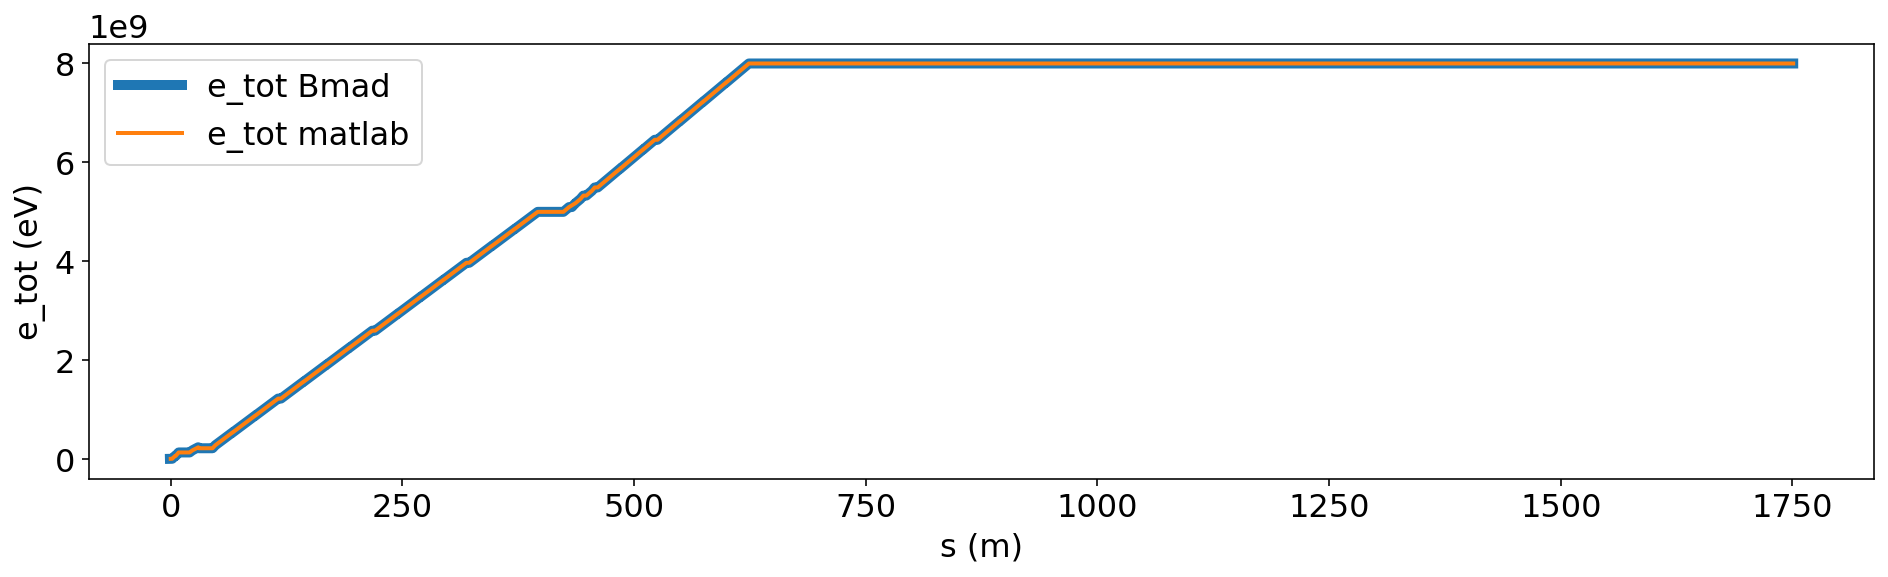

In [344]:
ix1 = 1
ix2 = ix_END

ix1_mat = 1
ix2_mat = N_ele_mat

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.e_tot'][ix1:ix2], label = r'e_tot Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], etot_array_mat[ix1_mat:ix2_mat]*1E9, label = r'e_tot matlab', linewidth=2.0)

plt.legend()
ax.set_xlabel('s (m)')
ax.set_ylabel('e_tot (eV)')

#### beta comparison

Text(0, 0.5, 'Twiss beta (m)')

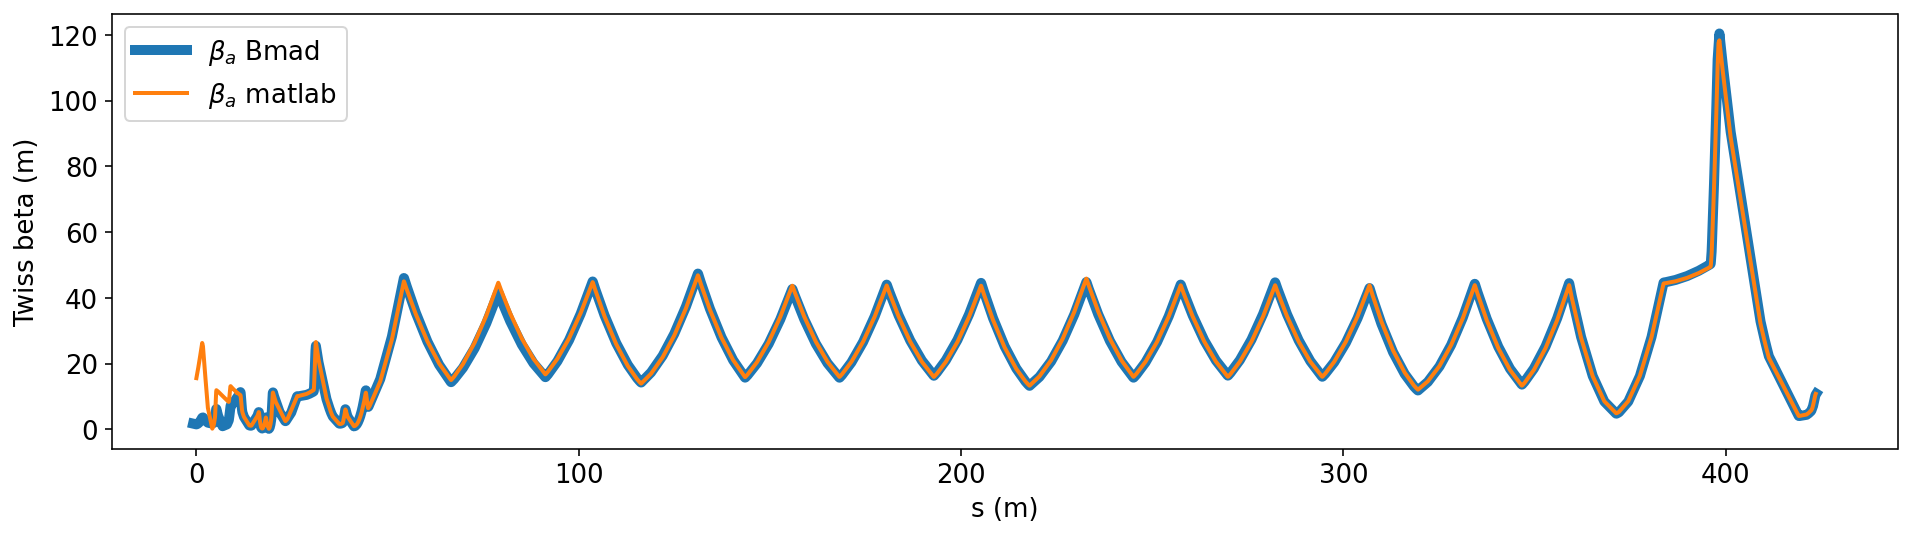

In [95]:
ix_ENDBC2 = ele_name_list.index('ENDBC2')
ix_ENDBC2_mat = np.where(ele_name_array_mat == 'ENDBC2')[0][0]

ix1 = 1
ix2 = ix_ENDBC2

ix1_mat = 1
ix2_mat = ix_ENDBC2_mat

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.a.beta'][ix1:ix2], label = r'$\beta_a$ Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], beta_x_array_mat[ix1_mat:ix2_mat], label = r'$\beta_a$ matlab', linewidth=2.0)

plt.legend()
ax.set_xlabel('s (m)')
ax.set_ylabel('Twiss beta (m)')

#### Note that the two designs DISAGREE before OTR2 (s $\approx$ 14.2m)

Text(0, 0.5, 'Twiss beta (m)')

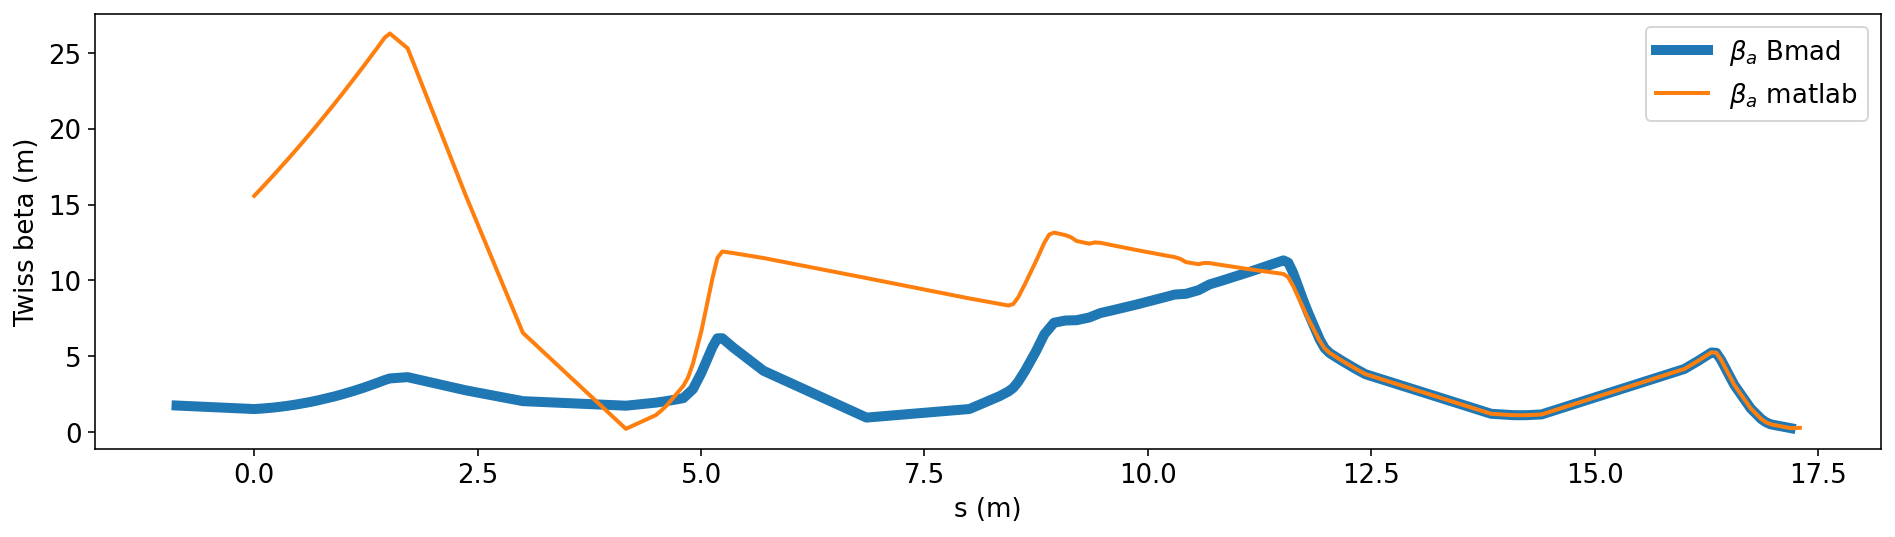

In [96]:
ix1 = 1
ix2 = 170

ix1_mat = 1
ix2_mat = 145

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.a.beta'][ix1:ix2], label = r'$\beta_a$ Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], beta_x_array_mat[ix1_mat:ix2_mat], label = r'$\beta_a$ matlab', linewidth=2.0)

plt.legend() 
ax.set_xlabel('s (m)')
ax.set_ylabel('Twiss beta (m)')

#### dispersion comparison

Text(0, 0.5, 'Twiss eta (m)')

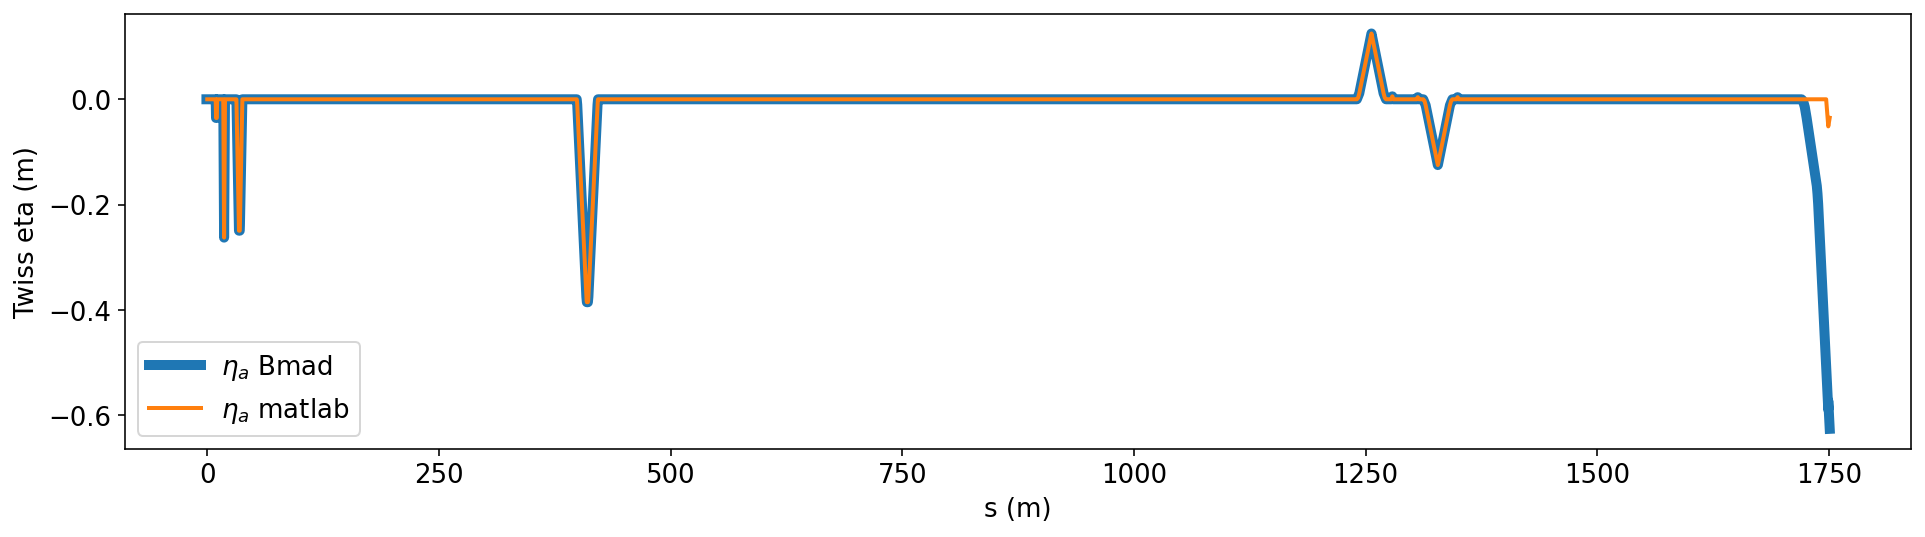

In [98]:
ix1 = 1
ix2 = ix_END

ix1_mat = 1
ix2_mat = N_ele_mat

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.a.eta'][ix1:ix2], label = r'$\eta_a$ Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], eta_x_array_mat[ix1_mat:ix2_mat], label = r'$\eta_a$ matlab', linewidth=2.0)

plt.legend()
ax.set_xlabel('s (m)')
ax.set_ylabel('Twiss eta (m)')

# !! Energy and optics comparison for model (with time-stamp)

In [345]:
tao.cmd('SLD')

# apply commands from the time-stamp
tao.cmd('set global lattice_calc_on = F')
tao.cmd('set ele quad::* field_master = T')
tao.cmds(timestamp_CMDS);
tao.cmd('set global lattice_calc_on = T')
output = get_output(tao)

# Sets matlab to extmodel (with time-stamp)
etot_array_mat, beta_x_array_mat, beta_y_array_mat, eta_x_array_mat, eta_y_array_mat \
= load_matlab_data('extmodel')

#### energy slightly mis-matched

Text(0, 0.5, 'e_tot (eV)')

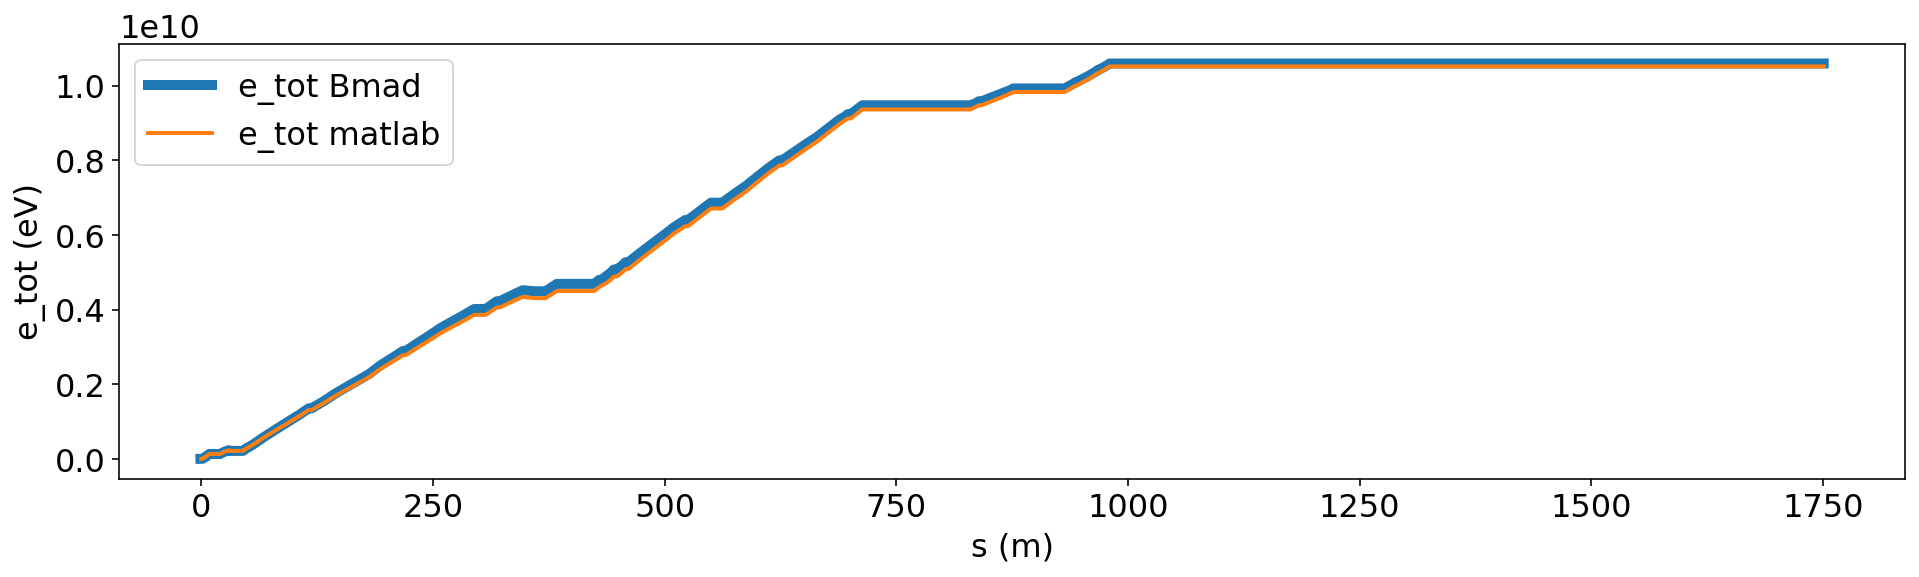

In [346]:
ix1 = 1
ix2 = ix_END

ix1_mat = 1
ix2_mat = N_ele_mat

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.e_tot'][ix1:ix2], label = r'e_tot Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], etot_array_mat[ix1_mat:ix2_mat]*1E9, label = r'e_tot matlab', linewidth=2.0)

plt.legend()
ax.set_xlabel('s (m)')
ax.set_ylabel('e_tot (eV)')

#### Run tao optimizer to match the energies to matlab model

In [361]:
def optimize_energy_cmds(en_ENDBC1, en_ENDBC2, en_ENDL3):
    
    out = f""" 
set global lattice_calc_on = F
set global optimizer = lmdif 
veto dat *
veto var *

set dat BC1.energy[4]|meas = {en_ENDBC1}
use dat BC1.energy[4]
!use var linac_fudge[1]

set dat BC2.energy[4]|meas = {en_ENDBC2}
use dat BC2.energy[4]
!use var linac_fudge[1:2]

set dat L3.energy[4]|meas = {en_ENDL3}
use dat L3.energy[4]
use var linac_fudge[1:3]

set global lattice_calc_on = T

show top

run
run
run
run

show dat BC1.energy
show merit
"""
    return out.split('\n')

In [367]:
en_ENDL3_mat


10515000000.000002

In [362]:
# Access the energies at ENDBC1, ENDBC2, and ENDL3 from matlab extmodel
ix_ENDBC1_mat = np.where(ele_name_array_mat == 'ENDBC1')[0][0]
en_ENDBC1_mat = etot_array_mat[ix_ENDBC1_mat]*1E9
ix_ENDBC2_mat = np.where(ele_name_array_mat == 'ENDBC2')[0][0]
en_ENDBC2_mat = etot_array_mat[ix_ENDBC2_mat]*1E9
ix_ENDL3_mat = np.where(ele_name_array_mat == 'ENDL3')[0][0]
en_ENDL3_mat = etot_array_mat[ix_ENDL3_mat]*1E9

In [363]:
# Form the optimization commands in Tao
optimize_energy_CMDS = optimize_energy_cmds(en_ENDBC1_mat, en_ENDBC2_mat, en_ENDL3_mat)

# Apply the commands
tao.cmds(optimize_energy_CMDS);

#### energy should be matched now

Text(0, 0.5, 'e_tot (eV)')

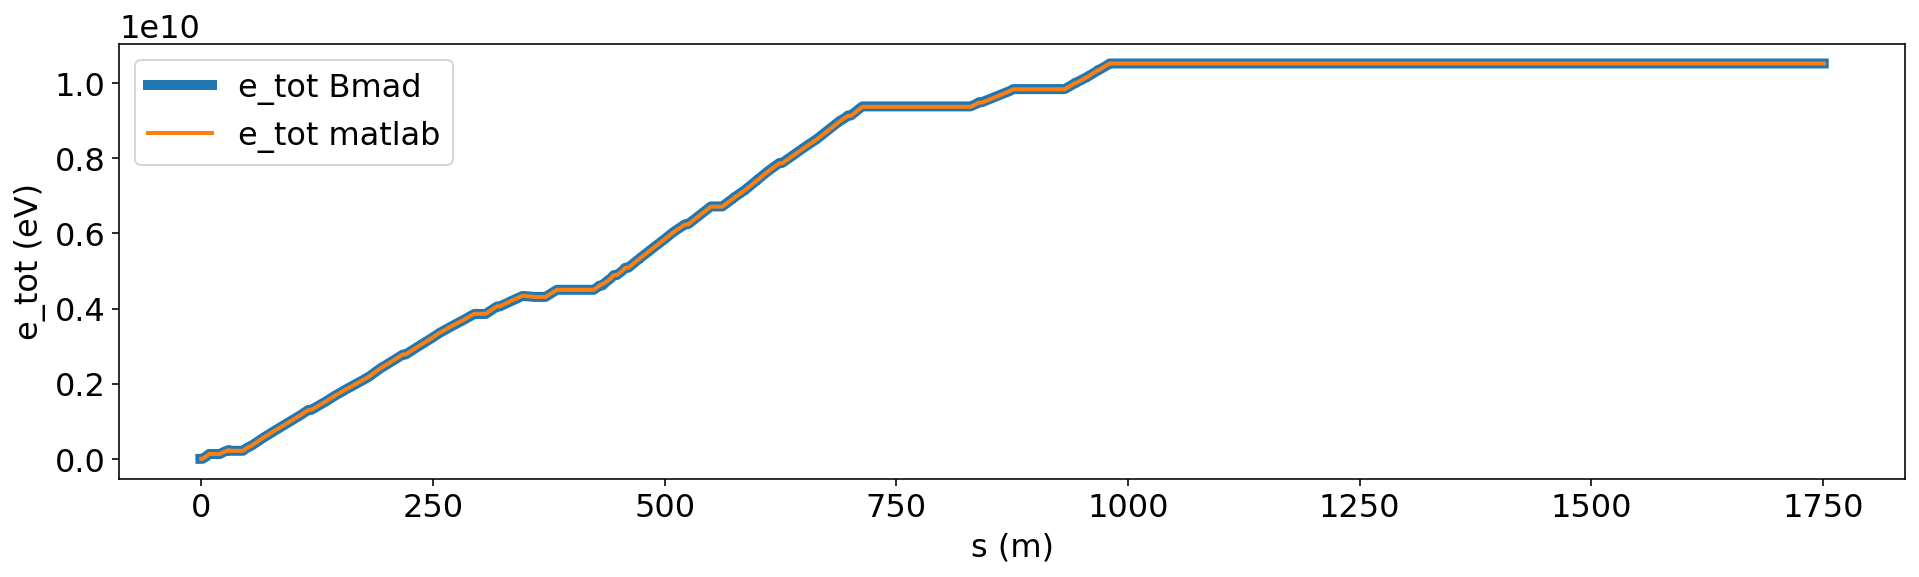

In [364]:
output = get_output(tao)

ix1 = 1
ix2 = ix_END

ix1_mat = 1
ix2_mat = N_ele_mat

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.e_tot'][ix1:ix2], label = r'e_tot Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], etot_array_mat[ix1_mat:ix2_mat]*1E9, label = r'e_tot matlab', linewidth=2.0)

plt.legend()
ax.set_xlabel('s (m)')
ax.set_ylabel('e_tot (eV)')

#### beta needs to be matched

Text(0, 0.5, 'Twiss beta (m)')

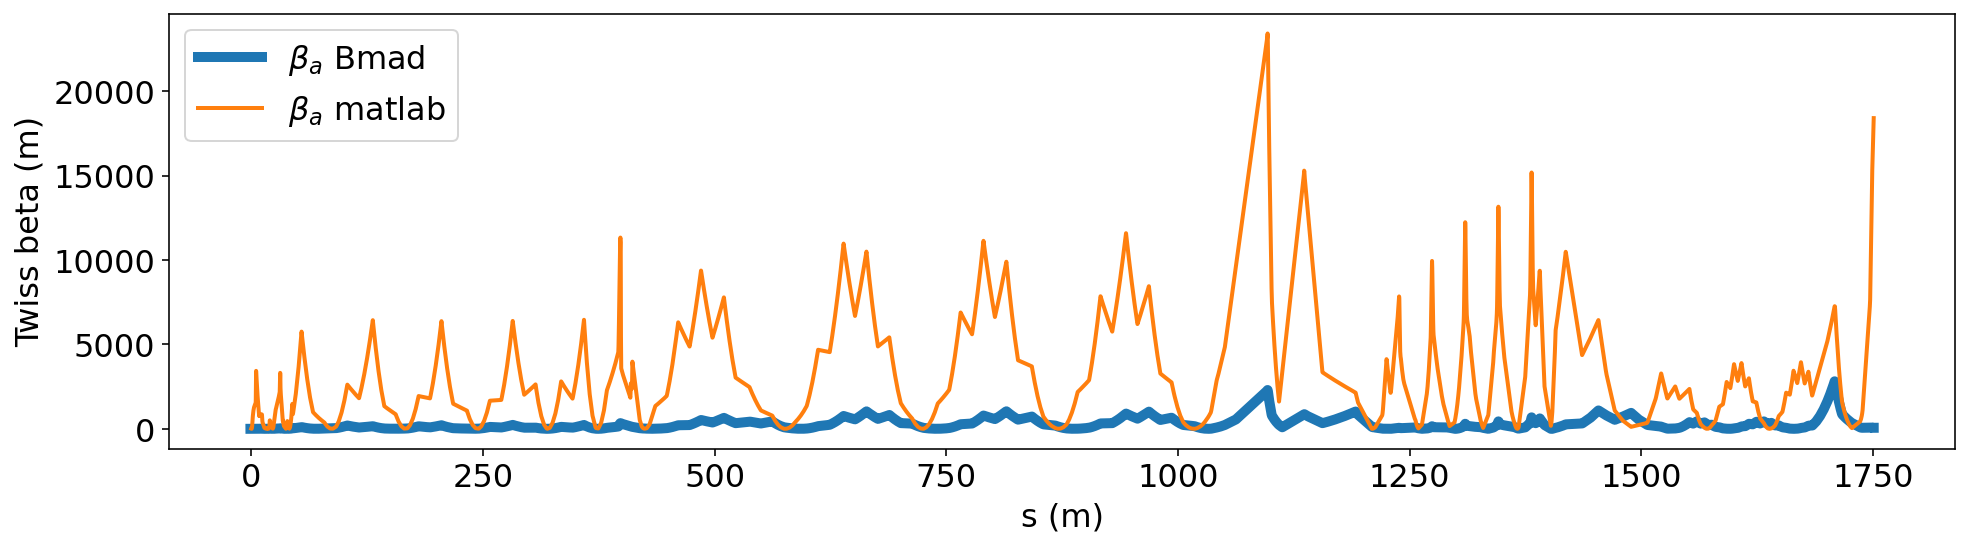

In [350]:
output = get_output(tao)

ix1 = 1
ix2 = ix_END

ix1_mat = 1
ix2_mat = N_ele_mat


fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.a.beta'][ix1:ix2], label = r'$\beta_a$ Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], beta_x_array_mat[ix1_mat:ix2_mat], label = r'$\beta_a$ matlab', linewidth=2.0)


plt.legend()
    
ax.set_xlabel('s (m)')
ax.set_ylabel('Twiss beta (m)')

#### matching beta functions (reference point is WS32)

In [358]:
def optimize_twiss_cmds(twiss):
    
    beta_a, alpha_a, beta_b, alpha_b, eta_x, etap_x, eta_y, etap_y = twiss
    
    out = f""" 
veto dat *
veto var *

use dat twiss[1,2,5,6]
use var beg_twiss[1,2,5,6]

!use dat twiss
!use var beg_twiss

set dat 1@twiss[1]|meas = {beta_a}
set dat 1@twiss[2]|meas = {alpha_a}
!set dat 1@twiss[3]|meas = {beta_b}
!set dat 1@twiss[4]|meas = {alpha_b}
set dat 1@twiss[5]|meas = {eta_x}
set dat 1@twiss[6]|meas = {etap_x}
!set dat 1@twiss[7]|meas = {eta_y}
!set dat 1@twiss[8]|meas = {etap_y}

set global lattice_calc_on = T

!show top

run
run
run
run
run
run
run
run
run

show dat twiss   
"""
    return out.split('\n')

# Use the Twiss at the element from Matlab extmodel as the reference Twiss
twiss_test = get_twiss_mat('WS32','extmodel')

optimize_twiss_CMDS = optimize_twiss_cmds(twiss_test)

In [359]:
## RUN THIS CELL at least TWICE and check if the merit drops yo a small number 
## It's possible for the first few runs to show error messages

# Apply commands for optimizing Twiss (equivalent to reverse-tracking + tracking)
tao.cmds(optimize_twiss_CMDS);

merit = tao.cmd('python merit')[0]
print( f'Tao optimizer merit is currently {float(merit)}')

Tao optimizer merit is currently 9.68454486513539e-19


Text(0, 0.5, 'Twiss beta (m)')

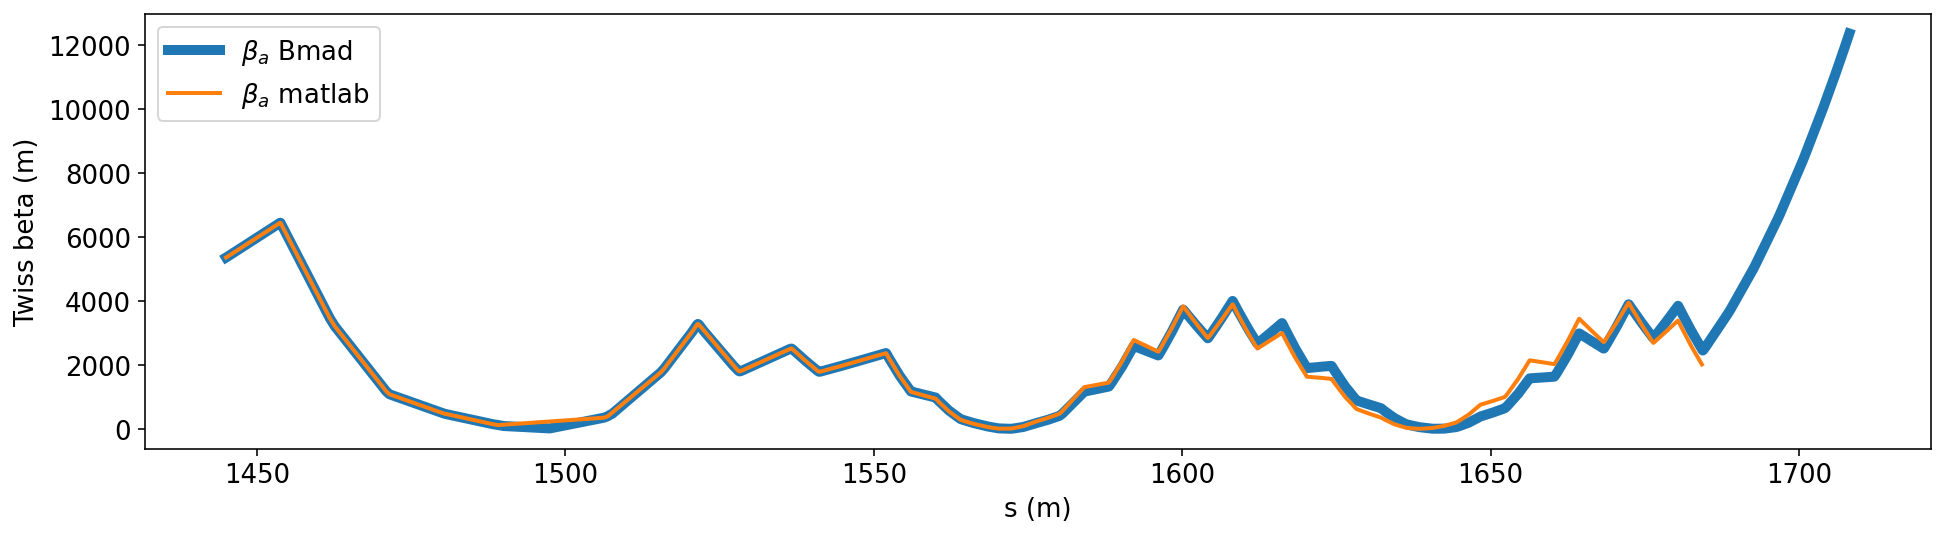

In [274]:
output = get_output(tao)
ix1 = ix_WS32
ix2 = ix_END-100

ix1_mat = ix_WS32_mat
ix2_mat = N_ele_mat-100

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.a.beta'][ix1:ix2], label = r'$\beta_a$ Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], beta_x_array_mat[ix1_mat:ix2_mat], label = r'$\beta_a$ matlab', linewidth=2.0)

plt.legend()
ax.set_xlabel('s (m)')
ax.set_ylabel('Twiss beta (m)')

Text(0, 0.5, 'Twiss beta (m)')

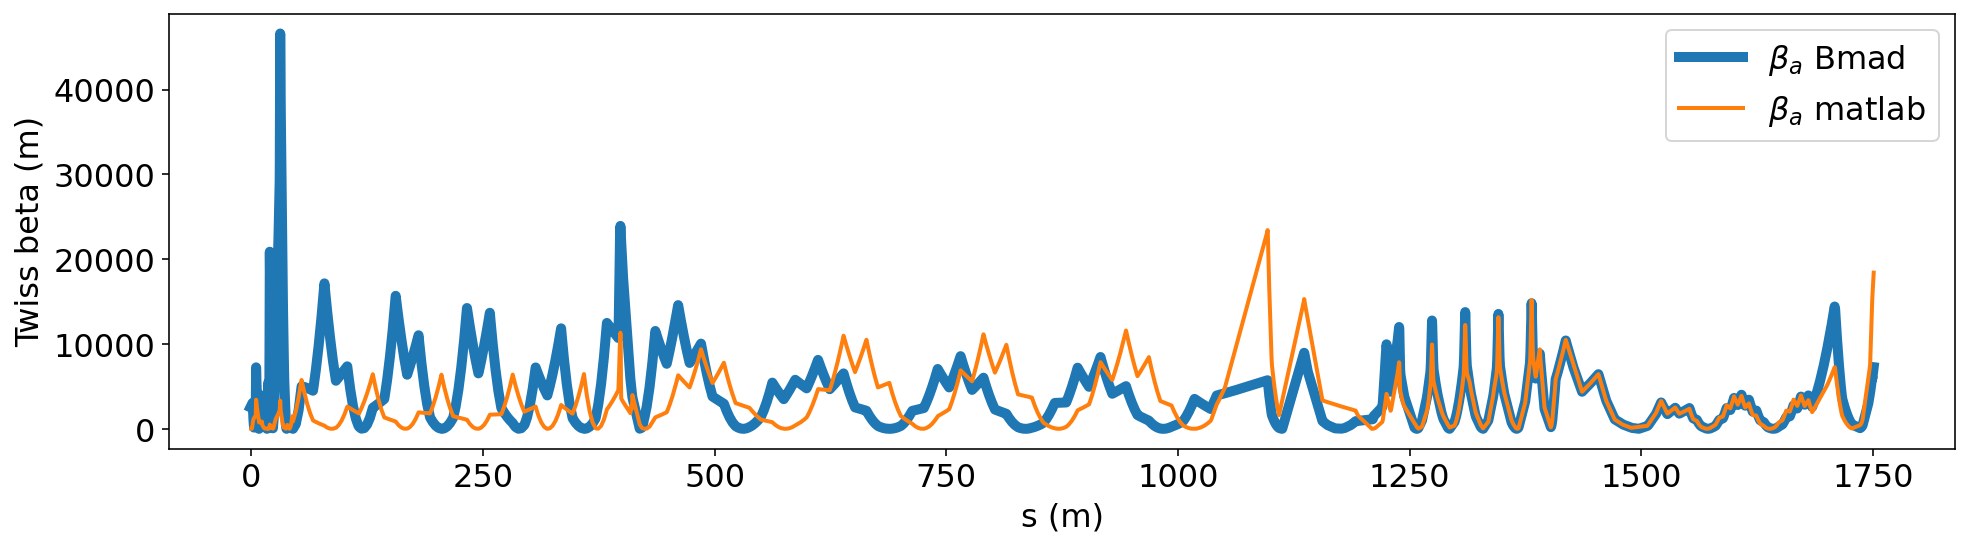

In [360]:
output = get_output(tao)

ix1 = 1
ix2 = ix_END

ix1_mat = 1
ix2_mat = N_ele_mat

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.a.beta'][ix1:ix2], label = r'$\beta_a$ Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], beta_x_array_mat[ix1_mat:ix2_mat], label = r'$\beta_a$ matlab', linewidth=2.0)

plt.legend()
ax.set_xlabel('s (m)')
ax.set_ylabel('Twiss beta (m)')

Text(0, 0.5, 'Twiss eta (m)')

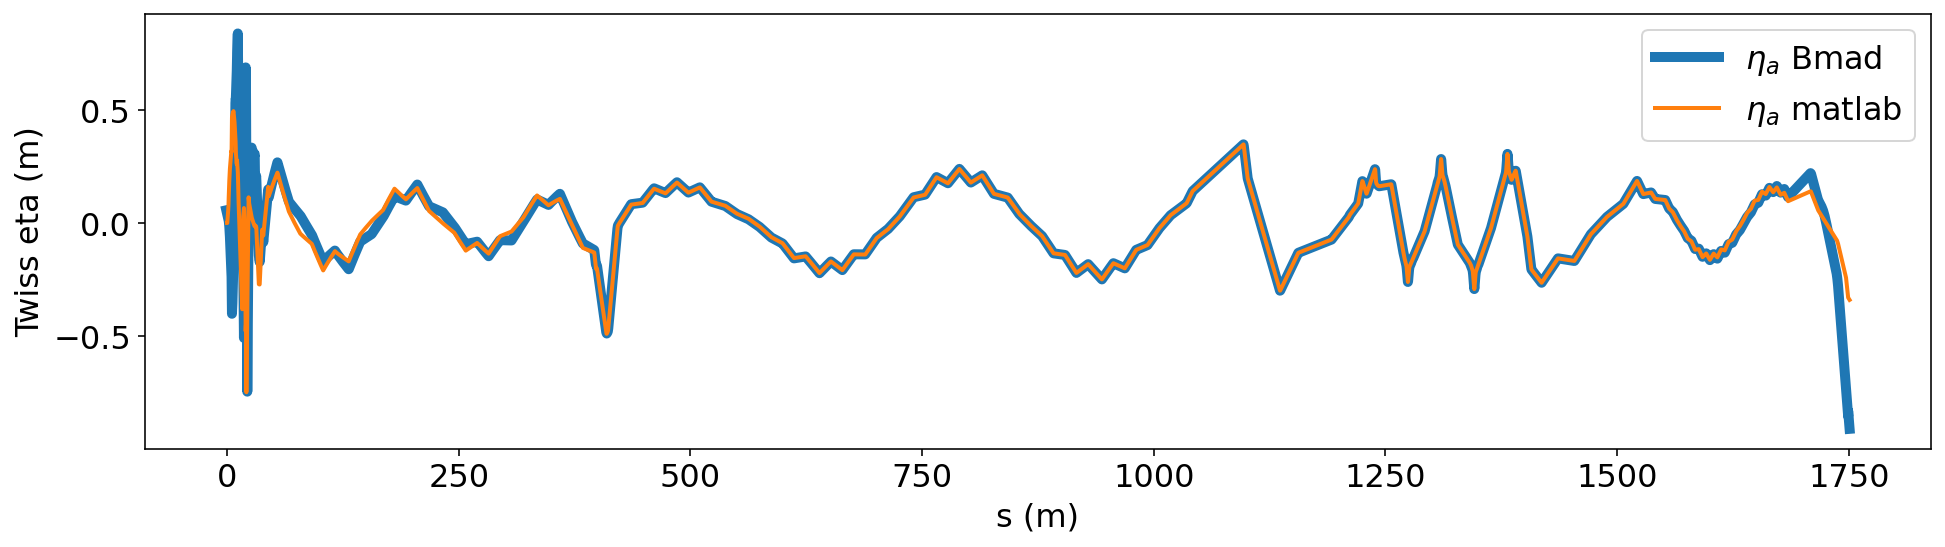

In [309]:
output = get_output(tao)

ix1 = 1
ix2 = ix_END

ix1_mat = 1
ix2_mat = N_ele_mat

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.a.eta'][ix1:ix2], label = r'$\eta_a$ Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], eta_x_array_mat[ix1_mat:ix2_mat], label = r'$\eta_a$ matlab', linewidth=2.0)

plt.legend()
ax.set_xlabel('s (m)')
ax.set_ylabel('Twiss eta (m)')

#### Match both x any y optics

In [351]:
def optimize_twiss_cmds(twiss):
    
    beta_a, alpha_a, beta_b, alpha_b, eta_x, etap_x, eta_y, etap_y = twiss
    
    out = f""" 
veto dat *
veto var *

!use dat twiss[1,2,5,6]
!use var beg_twiss[1,2,5,6]

use dat twiss
use var beg_twiss

set dat 1@twiss[1]|meas = {beta_a}
set dat 1@twiss[2]|meas = {alpha_a}
set dat 1@twiss[3]|meas = {beta_b}
set dat 1@twiss[4]|meas = {alpha_b}
set dat 1@twiss[5]|meas = {eta_x}
set dat 1@twiss[6]|meas = {etap_x}
set dat 1@twiss[7]|meas = {eta_y}
set dat 1@twiss[8]|meas = {etap_y}

set global lattice_calc_on = T

!show top

run
run
run
run
run
run
run
run
run

show dat twiss   
"""
    return out.split('\n')

# Use the Twiss at the element from Matlab extmodel as the reference Twiss
twiss_test = get_twiss_mat('WS32','extmodel')

optimize_twiss_CMDS = optimize_twiss_cmds(twiss_test)

In [357]:
%%tao
run

-------------------------
Tao> run


RuntimeError: Command: run causes error: ERROR detected: [ERROR | 2022-FEB-01 14:58:47] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   10    1.4666E+09
[ERROR | 2022-FEB-01 14:58:47] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   11    1.4666E+09
[ERROR | 2022-FEB-01 14:58:47] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   12    1.4666E+09
[ERROR | 2022-FEB-01 14:58:47] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   13    1.4666E+09
[ERROR | 2022-FEB-01 14:58:47] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   14    1.4666E+09
[ERROR | 2022-FEB-01 14:58:47] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   15    1.4666E+09
[ERROR | 2022-FEB-01 14:58:47] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   16    1.4666E+09
   17    1.0804E+11
   18    1.4712E+09
   19    1.4666E+09
   20    1.4666E+09
   21    1.4666E+09
   22    1.4666E+09
   23    1.4666E+09
   24    1.4666E+09
   25    1.4666E+09
   26    1.4666E+09
   27    1.4666E+09
   28    1.4666E+09
   29    1.4666E+09
   30    1.4666E+09
   31    1.4666E+09
   32    1.4666E+09
   33    1.4666E+09
   34    1.4666E+09
   35    1.4666E+09
   36    1.4666E+09
   37    1.4666E+09
   38    1.4666E+09
   39    1.4666E+09
   40    1.4666E+09
   41    1.4666E+09
   42    1.4666E+09
   43    1.4666E+09
   44    1.4666E+09
   45    1.4666E+09
   46    1.4665E+09
   47    1.4665E+09
   48    1.4665E+09
   49    1.4665E+09
   50    1.4665E+09
   51    1.4665E+09
   52    1.4665E+09
   53    1.4665E+09
   54    1.4665E+09
   55    1.4665E+09
   56    1.4665E+09
   57    1.4665E+09
   58    1.4665E+09
   59    1.4665E+09
   60    1.4665E+09
   61    1.4665E+09
   62    1.4665E+09
   63    1.4665E+09
   64    1.4665E+09
   65    1.4665E+09
   66    1.4665E+09
   67    1.4665E+09
   68    1.4665E+09
   69    1.4665E+09
   70    1.4665E+09
   71    1.4665E+09
   72    1.4665E+09
   73    1.4665E+09
   74    1.4665E+09
   75    1.4665E+09
   76    1.4665E+09
   77    1.4665E+09
   78    1.4665E+09
   79    1.4665E+09
   80    1.4665E+09
   81    1.4665E+09
   82    1.4664E+09
   83    1.4664E+09
   84    1.4664E+09
   85    1.4664E+09
   86    1.4664E+09
   87    1.4664E+09
   88    1.4664E+09
   89    1.4664E+09
   90    1.4664E+09
   91    1.4665E+09
   92    1.4664E+09
   93    1.4664E+09
   94    1.4664E+09
   95    1.4664E+09
   96    1.4664E+09
   97    1.4664E+09
   98    1.4664E+09
   99    1.4664E+09
  100    1.4664E+09
Written: var1.out

In [354]:
%%tao
sho merit

-------------------------
Tao> sho merit

! Top 10

Constraints                       Ref_Ele    Start_Ele   Ele/S    Meas-or-Lim    Model       Merit      Max_Loc
twiss[4]      alpha.b <target>                          WS32       3.2806E+02   4.1033E+03  1.425E+09
twiss[3]      beta.b <target>                           WS32       7.7984E+04   7.5985E+04  3.996E+07
twiss[2]      alpha.a <target>                          WS32      -5.9143E+01  -1.7723E+02  1.394E+06
twiss[1]      beta.a <target>                           WS32       5.3596E+03   5.3297E+03  8.968E+03
twiss[8]      etap.y <target>                           WS32      -4.8079E-06  -4.8129E-06  2.520E-15
twiss[7]      eta.y <target>                            WS32       4.9927E-04   4.9927E-04  7.984E-17
twiss[6]      etap.x <target>                           WS32      -6.7352E-04  -6.7352E-04  2.896E-23
twiss[5]      eta.x <target>                            WS32      -1.6231E-01  -1.6231E-01  3.391E-25
beg_twiss[3]  BEGINN

In [353]:
## RUN THIS CELL at least TWICE and check if the merit drops yo a small number 
## It's possible for the first few runs to show error messages

# Apply commands for optimizing Twiss (equivalent to reverse-tracking + tracking)
tao.cmds(optimize_twiss_CMDS);

merit = tao.cmd('python merit')[0]
print( f'Tao optimizer merit is currently {float(merit)}')

RuntimeError: Command: run causes error: ERROR detected: [ERROR | 2022-FEB-01 14:57:44] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   10    1.4682E+09
[ERROR | 2022-FEB-01 14:57:44] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   11    1.4682E+09
[ERROR | 2022-FEB-01 14:57:44] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   12    1.4682E+09
[ERROR | 2022-FEB-01 14:57:44] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   13    1.4682E+09
[ERROR | 2022-FEB-01 14:57:44] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   14    1.4682E+09
[ERROR | 2022-FEB-01 14:57:44] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   15    1.4682E+09
[ERROR | 2022-FEB-01 14:57:44] twiss_propagate1:
    NON-POSITIVE BETA DETECTED AT ELEMENT: BEGINNING  (0>>0)
   16    1.4682E+09
   17    2.2055E+12
   18    1.4698E+09
   19    1.4670E+09
   20    1.4670E+09
   21    1.4670E+09
   22    1.4670E+09
   23    1.4670E+09
   24    1.4670E+09
   25    1.4670E+09
   26    1.4670E+09
   27    1.4670E+09
   28    1.4671E+09
   29    1.4669E+09
   30    1.4669E+09
   31    1.4669E+09
   32    1.4669E+09
   33    1.4669E+09
   34    1.4669E+09
   35    1.4669E+09
   36    1.4669E+09
   37    1.4669E+09
   38    1.4669E+09
   39    1.4669E+09
   40    1.4669E+09
   41    1.4669E+09
   42    1.4669E+09
   43    1.4669E+09
   44    1.4669E+09
   45    1.4669E+09
   46    1.4669E+09
   47    1.4668E+09
   48    1.4668E+09
   49    1.4668E+09
   50    1.4668E+09
   51    1.4668E+09
   52    1.4668E+09
   53    1.4668E+09
   54    1.4668E+09
   55    1.4668E+09
   56    1.4668E+09
   57    1.4668E+09
   58    1.4668E+09
   59    1.4668E+09
   60    1.4668E+09
   61    1.4668E+09
   62    1.4668E+09
   63    1.4668E+09
   64    1.4668E+09
   65    1.4668E+09
   66    1.4668E+09
   67    1.4668E+09
   68    1.4668E+09
   69    1.4668E+09
   70    1.4668E+09
   71    1.4668E+09
   72    1.4668E+09
   73    1.4668E+09
   74    1.4667E+09
   75    1.4667E+09
   76    1.4667E+09
   77    1.4667E+09
   78    1.4667E+09
   79    1.4667E+09
   80    1.4667E+09
   81    1.4667E+09
   82    1.4667E+09
   83    1.4667E+09
   84    1.4667E+09
   85    1.4667E+09
   86    1.4667E+09
   87    1.4667E+09
   88    1.4667E+09
   89    1.4667E+09
   90    1.4667E+09
   91    1.4667E+09
   92    1.4666E+09
   93    1.4666E+09
   94    1.4666E+09
   95    1.4666E+09
   96    1.4666E+09
   97    1.4666E+09
   98    1.4666E+09
   99    1.4666E+09
  100    1.4666E+09
Written: var1.out

Text(0, 0.5, 'Twiss beta (m)')

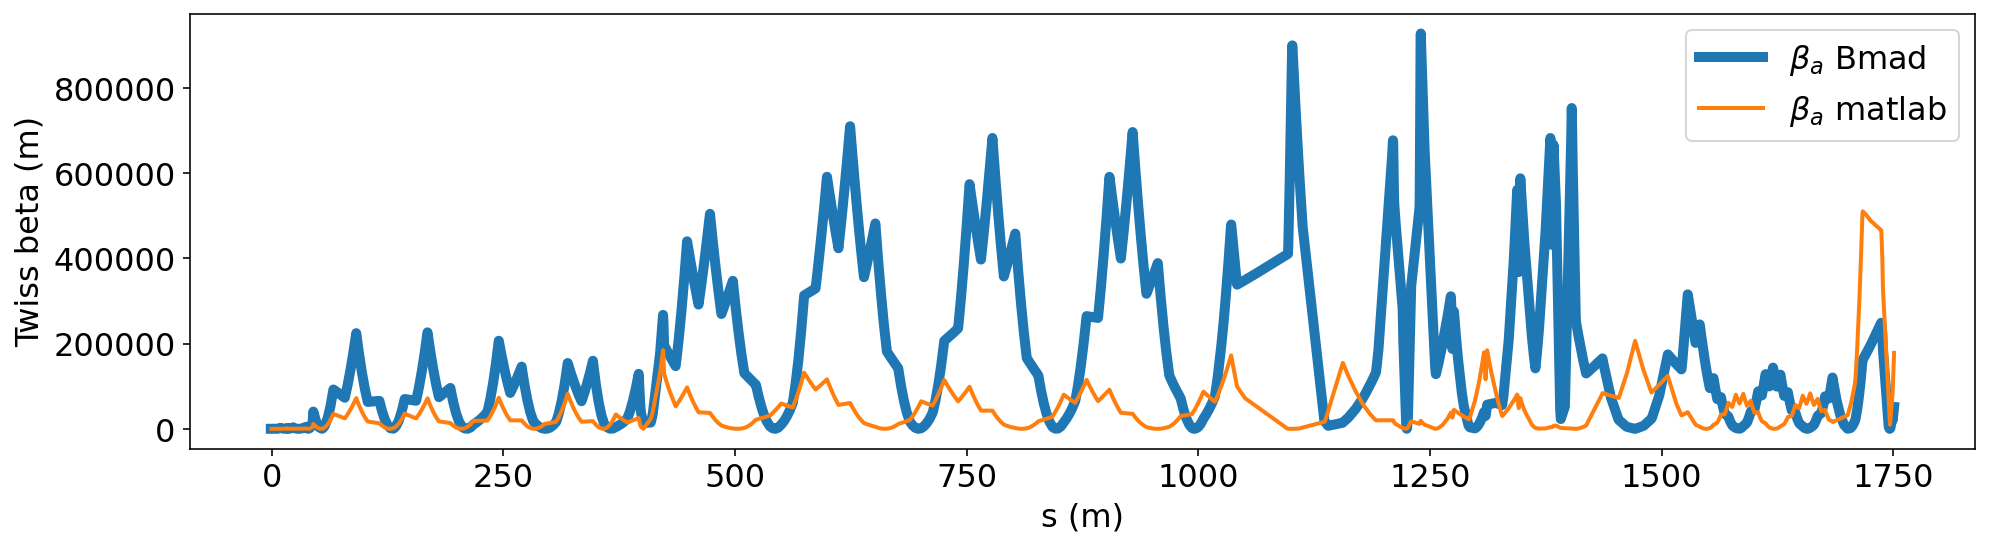

In [355]:
output = get_output(tao)

ix1 = 1
ix2 = ix_END

ix1_mat = 1
ix2_mat = N_ele_mat

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.b.beta'][ix1:ix2], label = r'$\beta_a$ Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], beta_y_array_mat[ix1_mat:ix2_mat], label = r'$\beta_a$ matlab', linewidth=2.0)

plt.legend()
ax.set_xlabel('s (m)')
ax.set_ylabel('Twiss beta (m)')

Text(0, 0.5, 'Twiss eta (m)')

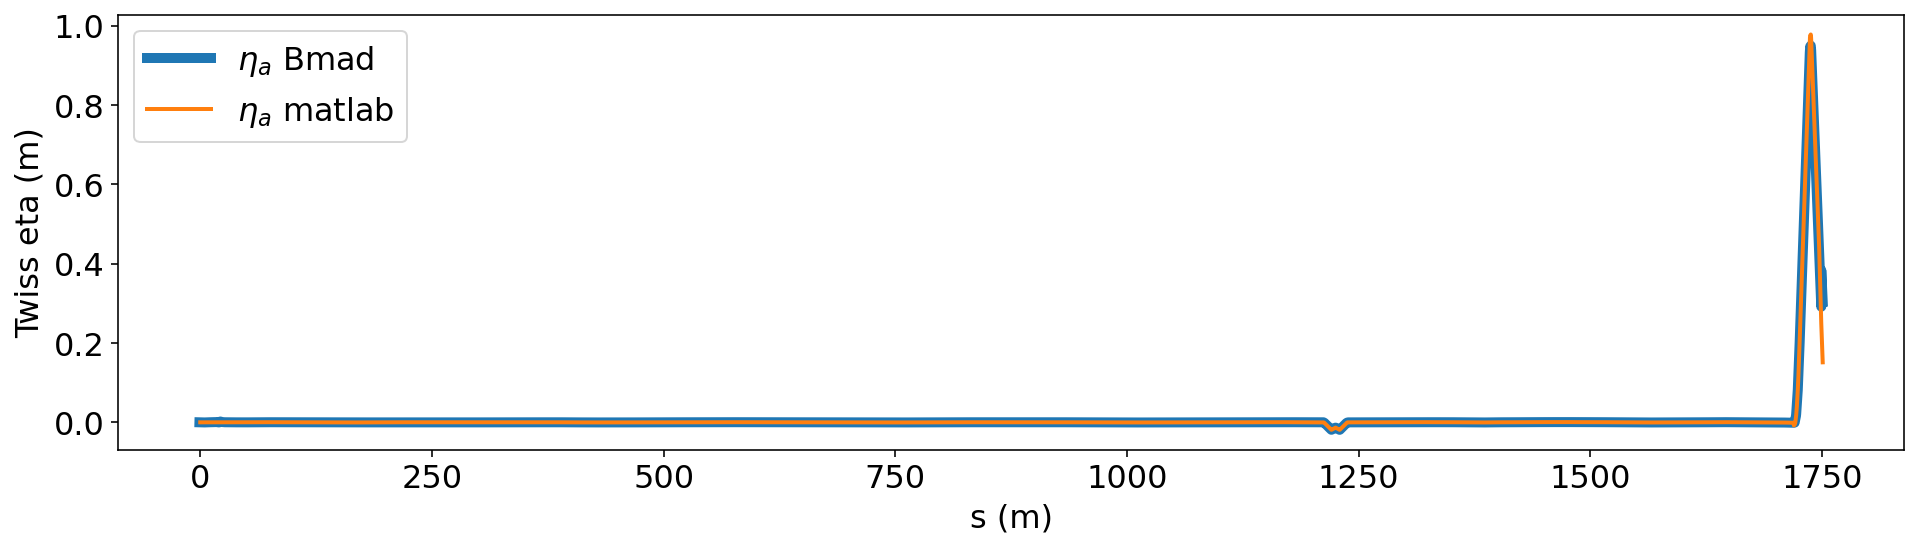

In [312]:
output = get_output(tao)

ix1 = 1
ix2 = ix_END

ix1_mat = 1
ix2_mat = N_ele_mat

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(output['ele.s'][ix1:ix2], output['ele.b.eta'][ix1:ix2], label = r'$\eta_a$ Bmad', linewidth=5.0)
ax.plot(s_array_mat[ix1_mat:ix2_mat], eta_y_array_mat[ix1_mat:ix2_mat], label = r'$\eta_a$ matlab', linewidth=2.0)

plt.legend()
ax.set_xlabel('s (m)')
ax.set_ylabel('Twiss eta (m)')